# Autoregressive Integrated Moving Averages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('F:\\MVS\\ozark\\ARIMA-And-Seasonal-ARIMA-master\\perrin-freres-monthly-champagne-.csv')

In [3]:
df.head(7)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0


In [4]:
df.columns=['month','sales']
df.head()

,month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.tail()

,month,sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)
df.tail(7)

,month,sales
98,1972-03,4577.0
99,1972-04,4788.0
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [7]:
df['month']=pd.to_datetime(df['month'])
df.head()

,month,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [8]:
df.set_index('month',inplace=True)
df.head()

,sales
month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [9]:
df.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Visualizing the Data

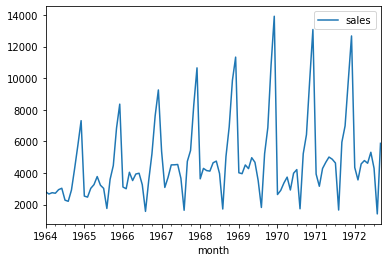

In [11]:
df.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['sales'])

In [13]:
test_result

(-1.8335930563276237,
 0.3639157716602447,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adfuller_test(df['sales'])

ADF Test Statistic : -1.8335930563276237
p-value : 0.3639157716602447
Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [20]:
df['sales'].shift(1)

month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: sales, Length: 105, dtype: float64

In [21]:
df['Sales First Difference']= df['sales'] - df['sales'].shift(1)

In [22]:
df['Sales First Difference']

month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: Sales First Difference, Length: 105, dtype: float64

In [23]:
df['Seasonal First Difference']=df['sales']-df['sales'].shift(12)

In [24]:
df.head()

,sales,Sales First Difference,Seasonal First Difference
month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [25]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


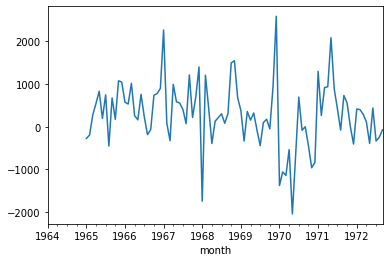

In [26]:
df['Seasonal First Difference'].plot()

# Auto Regressive Model

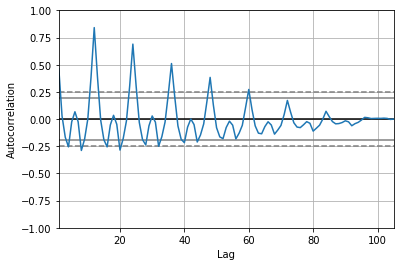

In [30]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['sales'])
plt.show()

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels as sm

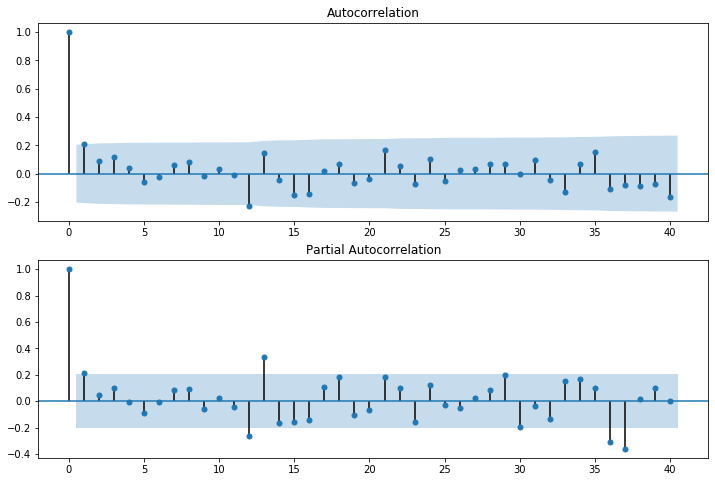

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [39]:
 #For non-seasonal data
    #p= Auto Relation Model lags
    #d= the Differencing
    #q= Moving Average model lags
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [44]:
model=ARIMA(df['sales'],order=(1,1,1))

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [46]:
model_fit=model.fit()

In [48]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Thu, 04 Jun 2020   AIC                           1910.251
Time:                        18:56:12   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7822     12.405      1.836      0.066      -1.532      47.096
ar.L1.D.sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

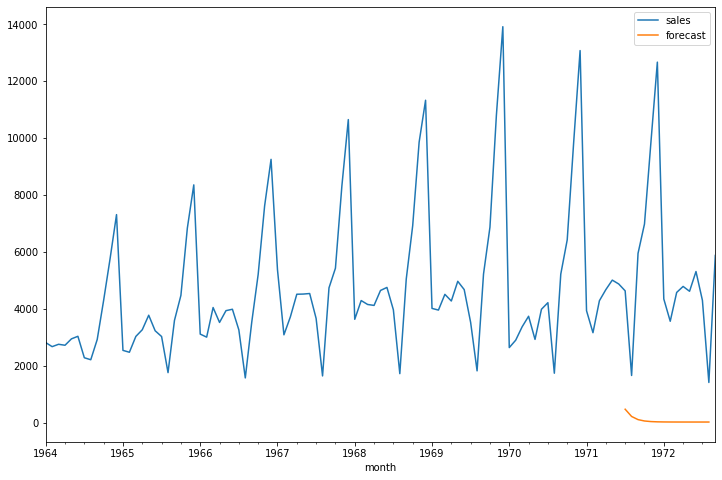

In [51]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

In [52]:
import statsmodels.api as sm

In [56]:
model=sm.tsa.statespace.SARIMAX(df['sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
Results=model.fit()

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [57]:
Results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Thu, 04 Jun 2020   AIC                           1486.804
Time:                                    19:11:57   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (Q):                       40.24   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.46   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

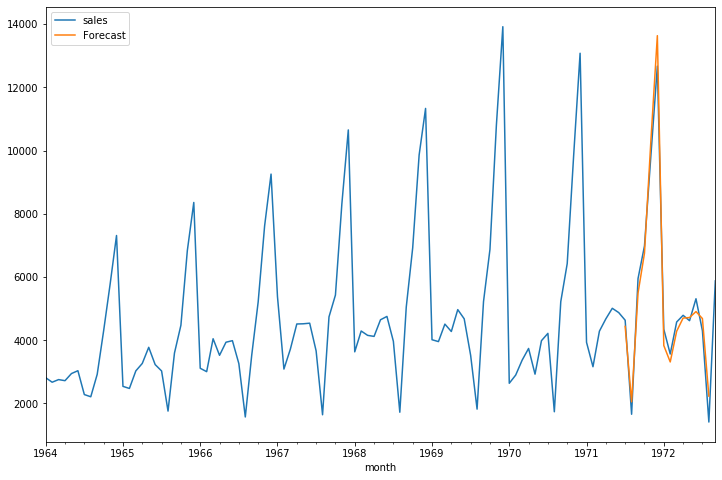

In [59]:
df['Forecast']=Results.predict(start=90,end=103,order=(1,1,1),dynamic=True)
df[['sales','Forecast']].plot(figsize=(12,8))

In [60]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [61]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [62]:
future_datest_df.tail()

,sales,Sales First Difference,Seasonal First Difference,forecast,Forecast
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [64]:
future_df=pd.concat([df,future_datest_df])

In [66]:
future_df.head(7)

,sales,Sales First Difference,Seasonal First Difference,forecast,Forecast
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN,NaN
1964-06-01,3036.0,90.0,NaN,NaN,NaN
1964-07-01,2282.0,-754.0,NaN,NaN,NaN


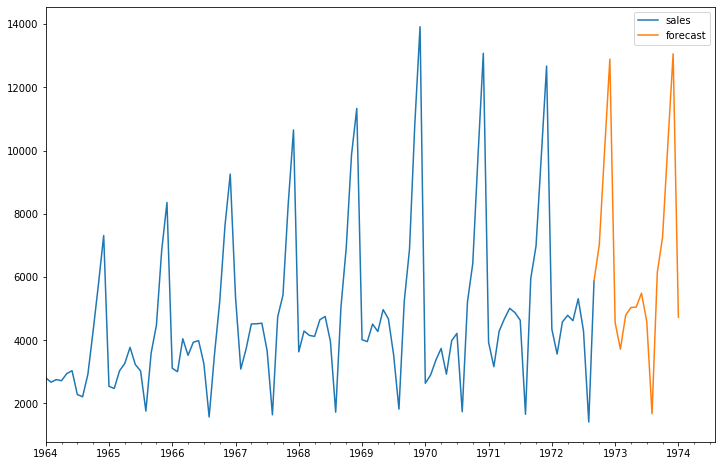

In [68]:
future_df['forecast']=Results.predict(start=104,end=120,Dynamic=True)
future_df[['sales','forecast']].plot(figsize=(12,8))